# Imports 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from zipfile import ZipFile
from PIL import Image
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Data Loading 

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
X_data =image_dataset_from_directory(
    directory='/content/gdrive/MyDrive/rps',
    image_size=(300,300),
    shuffle=True,
    labels='inferred',
    label_mode='categorical', 
    color_mode='rgb',
    seed=None,
    batch_size=2530
)

Found 2530 files belonging to 3 classes.


In [13]:
for image_batch, labels_batch in X_data:
  trainX=image_batch
  trainY=np.array(labels_batch)

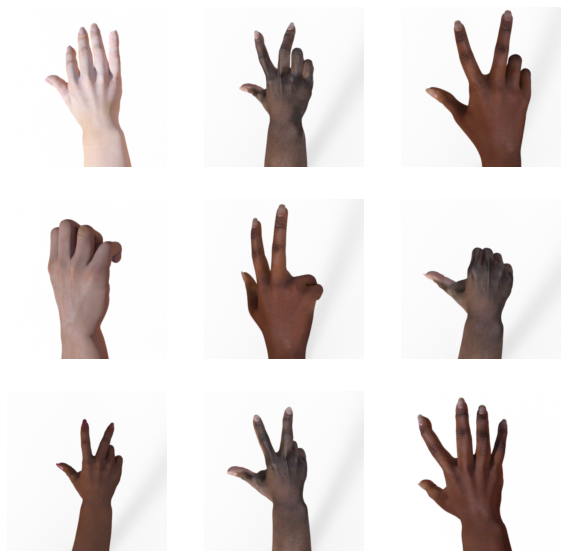

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in X_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

# Model Training an Tuning 

In [18]:
class ShallowNet:
    # create the architecture
    def build(height, width, depth, numFilters, classes):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with numFilters number of 3x3 filters
        model.add(Conv2D(numFilters, (3, 3), padding='same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        
        # add a softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        return model

In [15]:
trainX = trainX.astype('float32')/255.0

Shallow Net using adam optimizer, Loss: crossentropy , and three filters 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 300, 300, 3)       84        
_________________________________________________________________
activation_3 (Activation)    (None, 300, 300, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 270000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 810003    
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 810,087
Trainable params: 810,087
Non-trainable params: 0
_________________________________________________________________
None
[INFO] training network...
Epoch 1/20
16/16 [==============================] - 3s 134ms/step - loss: 9.9310 -

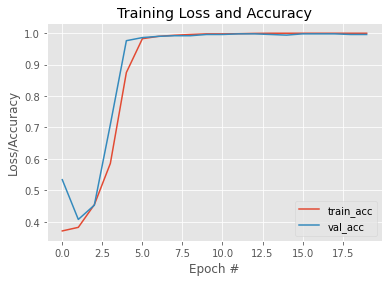

In [16]:
model = ShallowNet.build(300, 300, 3, 3, 3)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure
plt.plot(np.arange(0, maxIt), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Shallow Net using SGD optimizer, Loss: crossentropy , and three filters 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 3)       84        
_________________________________________________________________
activation_2 (Activation)    (None, 300, 300, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 270000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 810003    
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 810,087
Trainable params: 810,087
Non-trainable params: 0
_________________________________________________________________
None
[INFO] training network...
Epoch 1/20
64/64 [==============================] - 3s 37ms/step - loss: 1.4195 - 

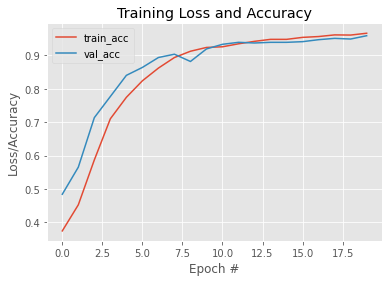

In [10]:
model = ShallowNet.build(300, 300, 3, 3, 3)
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001), metrics = ['acc'])
print(model.summary())

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, maxIt), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Changing architecture
Added L1 and L2 Regularization set both to 0.005

In [11]:
tf.keras.backend.clear_session()
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l1_l2

class ShallowNet:
    # create the architecture
    def build(height, width, depth, numFilters, classes,lam1 = 0, lam2 = 0):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with numFilters number of 3x3 filters
        model.add(Conv2D(numFilters, (3, 3), padding='same', input_shape = (height, width, depth),
                         kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        
        # add a softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 3)       84        
_________________________________________________________________
activation (Activation)      (None, 300, 300, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 270000)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 810003    
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 810,087
Trainable params: 810,087
Non-trainable params: 0
_________________________________________________________________
None
[INFO] training network...
Epoch 1/20
64/64 [==============================] - 3s 34ms/step - loss: 51.4033 - a

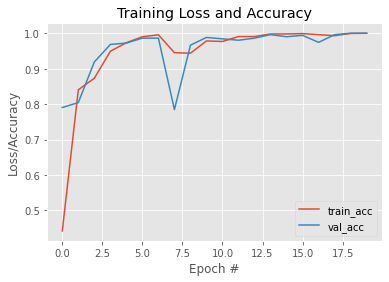

In [12]:
model = ShallowNet.build(300, 300, 3, 3, 3,0.5,0.005)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, maxIt), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

 Changing architecture:Added max pooling and drop out 

In [13]:
tf.keras.backend.clear_session()
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l1_l2

class ShallowNet:
    # create the architecture
    def build(height, width, depth, numFilters, classes,lam1 = 0, lam2 = 0, dropout = [0, 0, 0, 0.5]):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with numFilters number of 3x3 filters
        model.add(Conv2D(numFilters, (3, 3), padding='same', input_shape = (height, width, depth),
                         kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[0]))
        
        # add a softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 3)       84        
_________________________________________________________________
activation (Activation)      (None, 300, 300, 3)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 3)       0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 202503    
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0

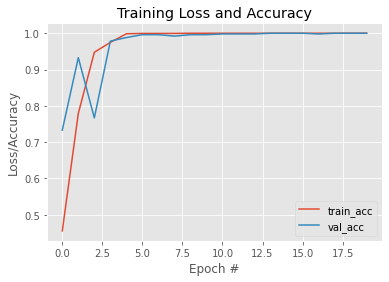

In [14]:
model = ShallowNet.build(300, 300, 3, 3, 3)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, maxIt), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Change in Architecture 
Added another convulution layer with 64 5 x 5 filters and 2 X 2 max pooling with L1 and L2 regularization and Dropout.

In [9]:
tf.keras.backend.clear_session()
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l1_l2

class ShallowNet:
    # create the architecture
    def build(height, width, depth, numFilters, classes,lam1 = 0, lam2 = 0, dropout = [0, 0, 0, 0.5]):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with numFilters number of 3x3 filters
        model.add(Conv2D(numFilters, (3, 3), padding='same', input_shape = (height, width, depth),
                         kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[0]))

        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[1]))
        
        # add a softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        return model

With SGD(0.001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 3)       84        
_________________________________________________________________
activation (Activation)      (None, 300, 300, 3)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 3)       0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      4864      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0

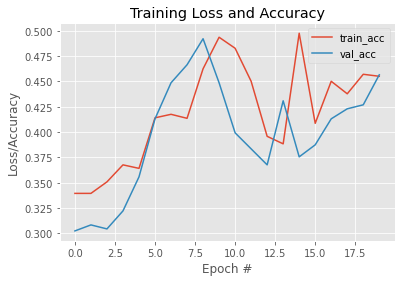

In [9]:
model = ShallowNet.build(300, 300, 3, 3, 3,0.01,0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001), metrics = ['acc'])
print(model.summary())

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, maxIt), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

With Adam optimizer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 3)       84        
_________________________________________________________________
activation (Activation)      (None, 300, 300, 3)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 3)       0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      4864      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0

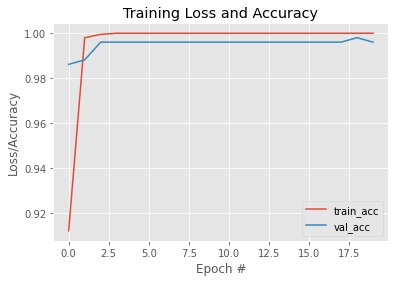

In [16]:
model = ShallowNet.build(300, 300, 3, 3, 3)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, maxIt), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Selecting best L1 and L2 values 

In [11]:
best_hyperparameters = [0, 0]
best_accuracy = 0
#print("[INFO] training network...")
for l1 in [0.001, 0.1]:
    for l2 in [0.001,0.1]:
      model = ShallowNet.build(300, 300, 3, 3, 3,l1,l2)
      model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
      maxIt = 5
      H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 0)
      dev_accuracy = H.history['val_acc'][-1]
      print('Dev accuracy for l1 =', l1, ', l2 =', l2, 'is', dev_accuracy)
        
      if dev_accuracy > best_accuracy: best_hyperparameters = [l1, l2]

Dev accuracy for l1 = 0.001 , l2 = 0.001 is 0.9960474371910095
Dev accuracy for l1 = 0.001 , l2 = 0.1 is 1.0
Dev accuracy for l1 = 0.1 , l2 = 0.001 is 0.9940711259841919
Dev accuracy for l1 = 0.1 , l2 = 0.1 is 0.9901185631752014


In [13]:
print('Best L1 and L2 values',best_hyperparameters)

Best L1 and L2 values [0.1, 0.1]


Finding best dropout percentages 

In [9]:
best_hyperparameters = [0, 0]
best_accuracy = 0
#print("[INFO] training network...")
for dropout in [[0.5, 0.5, 0, 0.5], [0, 0.1, 0.1, 0.5], [0, 0.1, 0.2, 0.5]]:
      model = ShallowNet.build(300, 300, 3, 3, 3,dropout=dropout)
      model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
      maxIt = 10
      H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 0)
      dev_accuracy = H.history['val_acc'][-1]
      print('Dev accuracy for dropout percentages', dropout, 'is', H.history['val_acc'][-1])

Dev accuracy for dropout percentages [0.5, 0.5, 0, 0.5] is 0.9980236887931824
Dev accuracy for dropout percentages [0, 0.1, 0.1, 0.5] is 0.9960474371910095
Dev accuracy for dropout percentages [0, 0.1, 0.2, 0.5] is 1.0


Model with mean squared error with L1 and L2 regularization ad dropout  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 300, 300, 3)       84        
_________________________________________________________________
activation_3 (Activation)    (None, 300, 300, 3)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 150, 150, 3)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 64)      4864      
_________________________________________________________________
activation_4 (Activation)    (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 64)       

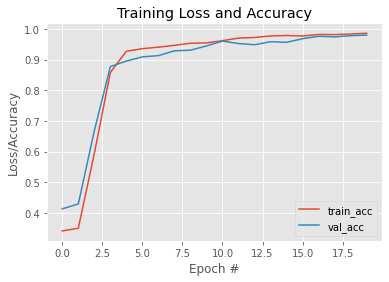

In [11]:
model = ShallowNet.build(300, 300, 3, 3, 3,0.1,0.1,[0, 0.1, 0.2, 0.5])
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, maxIt), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Loading the Test Data 

In [19]:
X_testData=image_dataset_from_directory(
    directory='/content/gdrive/MyDrive/rps-test-set',
    image_size=(300,300),
    shuffle=True,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    seed=None,
    batch_size=372
)

Found 372 files belonging to 3 classes.


In [20]:
for image_batch, labels_batch in X_testData:
  testX=image_batch
  testY=np.array(labels_batch)

In [21]:
testX = testX.astype('float32')/255.0

In [10]:
model = ShallowNet.build(300, 300, 3, 3, 3,0.1,0.1,[0, 0.1, 0.2, 0.5])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
maxIt = 20
H = model.fit(testX, testY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)


Epoch 1/20
10/10 [==============================] - 17s 78ms/step - loss: 20.0259 - acc: 0.3367 - val_loss: 15.4702 - val_acc: 0.5067
Epoch 2/20
10/10 [==============================] - 0s 41ms/step - loss: 14.5967 - acc: 0.5892 - val_loss: 13.5091 - val_acc: 0.5467
Epoch 3/20
10/10 [==============================] - 0s 41ms/step - loss: 12.8177 - acc: 0.6566 - val_loss: 11.9398 - val_acc: 0.7200
Epoch 4/20
10/10 [==============================] - 0s 42ms/step - loss: 11.4755 - acc: 0.6296 - val_loss: 10.7041 - val_acc: 0.8667
Epoch 5/20
10/10 [==============================] - 0s 42ms/step - loss: 10.2744 - acc: 0.7172 - val_loss: 9.7172 - val_acc: 0.8133
Epoch 6/20
10/10 [==============================] - 0s 41ms/step - loss: 9.3109 - acc: 0.7778 - val_loss: 8.8178 - val_acc: 0.8400
Epoch 7/20
10/10 [==============================] - 0s 40ms/step - loss: 8.4840 - acc: 0.8316 - val_loss: 8.1804 - val_acc: 0.7067
Epoch 8/20
10/10 [==============================] - 0s 41ms/step - loss: 

# Model Testing 


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       124
           1       0.96      0.94      0.95       124
           2       0.95      0.94      0.95       124

    accuracy                           0.96       372
   macro avg       0.96      0.96      0.96       372
weighted avg       0.96      0.96      0.96       372


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

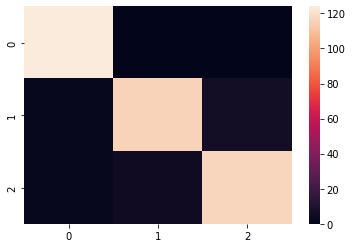

<Figure size 432x288 with 0 Axes>

In [11]:
from seaborn import heatmap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# predict the labels of the test set
predictedY = model.predict(testX)
#Added 
predictedY = predictedY.argmax(axis=1)
testY =testY.argmax(axis=1)

# print quality metricsl
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)
#Added
predictedY = predictedY.argmax(axis=1)
print('\nTesting Confusion Matrix:\n')

heatmap(confusion_matrix(testY, predictedY))
plt.figure()

# Conclusion
The test accuracy found was 96%. Inorder to train and tune  the model I first started wih a shallow net, 1 convolution layer and a soft max classifier in this model I changed the optimizer used from adam to SGD.After which I started to add more layers, max pooling as well as dropout, I also added L1 and L2 regularization.After each adddition was made to the network I ran the training set.Since the training accuracy and validation accuracy was so good after just running on the shallow net(without any changes) I ran the test data once on the shallow net and got a accuracy of 54% as seen below.Once everthing was added to the model I tuned the L1 and L2 values, only 4 values were used as using more woud result in the session crashing before all L1 and L2 values cound be tested.The same method used to tune the regularization was used on dropout.At the end the test accuracy was found to be 96%

In [22]:
from seaborn import heatmap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# predict the labels of the test set
predictedY = model.predict(testX)
#Added 
predictedY = predictedY.argmax(axis=1)
testY =testY.argmax(axis=1)

# print quality metricsl
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))



Testing Classification Report:

               precision    recall  f1-score   support

           0       0.58      0.37      0.45       124
           1       0.51      0.66      0.57       124
           2       0.59      0.62      0.60       124

    accuracy                           0.55       372
   macro avg       0.56      0.55      0.54       372
weighted avg       0.56      0.55      0.54       372

